In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_2023 = pd.read_csv(r'C:\Users\Reet\Downloads\dataset\Time_series\Airbnb\AB_US_2023.csv')
df_2023.head(3) 

C:\Users\Reet\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco


# Time Series Forecasting of AirBnb Price for future one step ahead prediction part 1

In [19]:
df_2023['city'].unique()

array(['San Francisco', 'Washington D.C.', 'Oakland', 'Jersey City',
       'New Orleans', 'Los Angeles', 'New York City', 'Cambridge',
       'Santa Clara County', 'Asheville', 'Salem', 'Columbus',
       'Rhode Island', 'San Diego', 'Nashville', 'Santa Cruz County',
       'Denver', 'Chicago', 'Austin', 'Pacific Grove', 'Portland',
       'Seattle', 'Twin Cities MSA', 'Broward County', 'Clark County',
       'Boston', 'San Mateo County'], dtype=object)

In [20]:
new = df_2023[['last_review','price','city']] 

In [21]:
new 

,last_review,price,city
0,2023-02-19,202,San Francisco
1,2017-08-06,235,San Francisco
2,2022-10-27,56,San Francisco
3,2019-06-28,575,San Francisco
4,2023-02-25,110,San Francisco
...,...,...,...
232142,NaN,389,San Mateo County
232143,NaN,158,San Mateo County
232144,NaN,97,San Mateo County
232145,NaN,62,San Mateo County


In [22]:
new.dropna(inplace=True)

C:\Users\Reet\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [23]:
new

,last_review,price,city
0,2023-02-19,202,San Francisco
1,2017-08-06,235,San Francisco
2,2022-10-27,56,San Francisco
3,2019-06-28,575,San Francisco
4,2023-02-25,110,San Francisco
...,...,...,...
232107,2023-03-21,60,San Mateo County
232112,2023-03-17,52,San Mateo County
232113,2023-03-11,59,San Mateo County
232114,2023-03-19,100,San Mateo County


In [24]:
new['last_review'] = pd.to_datetime(new['last_review'])

C:\Users\Reet\AppData\Local\Temp/ipykernel_34644/4047954776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['last_review'] = pd.to_datetime(new['last_review'])


In [25]:
new= new.set_index('last_review')
new.index

DatetimeIndex(['2023-02-19', '2017-08-06', '2022-10-27', '2019-06-28',
               '2023-02-25', '2023-01-28', '2023-02-17', '2022-11-26',
               '2015-05-17', '2022-06-11',
               ...
               '2023-03-17', '2023-03-25', '2023-03-01', '2023-03-11',
               '2023-03-16', '2023-03-21', '2023-03-17', '2023-03-11',
               '2023-03-19', '2023-03-17'],
              dtype='datetime64[ns]', name='last_review', length=183062, freq=None)

In [80]:
new.head()

,price,city
last_review,,
2023-02-19,202,San Francisco
2017-08-06,235,San Francisco
2022-10-27,56,San Francisco
2019-06-28,575,San Francisco
2023-02-25,110,San Francisco


In [125]:
from datetime import datetime
datelist = pd.date_range(start="2023-01-01",end="2023-08-17")
datelist = pd.DataFrame(datelist)
datelist = datelist.set_index(0)
merged_df = datelist.merge(new,how='left', left_on=0, right_on=new.index)
merged_df.rename(columns = {'key_0':'date'}, inplace = True)
merged_df['price'] = merged_df['price'].fillna(0.0)
merged_df['city'] = merged_df['city'].fillna('unreported')
merged_df['day'] = merged_df['date'].map(lambda x: x.day)
merged_df['month'] = merged_df['date'].map(lambda x: x.month)
merged_df['year'] = merged_df['date'].map(lambda x: x.year)

## GroupBY
merged_df_grouped = pd.DataFrame(merged_df.groupby(['city','month'])['price'].sum())
merged_df_grouped.head(5)

price
city      month          
Asheville 1       63811.0
          2      105336.0
          3      159926.0
Austin    1      190162.0
          2      614897.0

In [126]:
merged_df

,date,price,city,day,month,year
0,2023-01-01,100.0,San Francisco,1,1,2023
1,2023-01-01,411.0,San Francisco,1,1,2023
2,2023-01-01,137.0,San Francisco,1,1,2023
3,2023-01-01,129.0,San Francisco,1,1,2023
4,2023-01-01,209.0,San Francisco,1,1,2023
...,...,...,...,...,...,...
103392,2023-08-13,0.0,unreported,13,8,2023
103393,2023-08-14,0.0,unreported,14,8,2023
103394,2023-08-15,0.0,unreported,15,8,2023
103395,2023-08-16,0.0,unreported,16,8,2023


In [127]:
merged_df_grouped = merged_df_grouped.unstack()
merged_df_grouped = merged_df_grouped.T 
merged_df_grouped

city         Asheville    Austin    Boston  Broward County  Cambridge  \
      month                                                             
price 1        63811.0  190162.0   46056.0        324274.0    11710.0   
      2       105336.0  614897.0   82598.0        507749.0     9338.0   
      3       159926.0  763061.0  128367.0       1864632.0    43519.0   
      4            NaN       NaN       NaN             NaN        NaN   
      5            NaN       NaN       NaN             NaN        NaN   
      6            NaN       NaN       NaN             NaN        NaN   
      7            NaN       NaN       NaN             NaN        NaN   
      8            NaN       NaN       NaN             NaN        NaN   

city          Chicago  Clark County  Columbus    Denver  Jersey City  ...  \
      month                                                           ...   
price 1       86894.0      186126.0   12238.0   43601.0      20522.0  ...   
      2      143291.0      258828.0   23793.0   57732.0      15410.0  ...   
      3      323646.0     1137984.0  172961.0  305632.0      42675.0  ...   
      4           NaN           NaN       NaN       NaN          NaN  ...   
      5           NaN           NaN       NaN       NaN          NaN  ...   
      6           NaN           NaN       NaN       NaN          NaN  ...   
      7           NaN           NaN       NaN       NaN          NaN  ...   
      8           NaN           NaN       NaN       NaN          NaN  ...   

city           Salem  San Diego  San Francisco  San Mateo County  \
      month                                                        
price 1       2243.0   235559.0       201158.0           43621.0   
      2       2945.0   467941.0       307544.0           67209.0   
      3      11712.0  1166250.0        46567.0          211007.0   
      4          NaN        NaN            NaN               NaN   
      5          NaN        NaN            NaN               NaN   
      6          NaN        NaN            NaN               NaN   
      7          NaN        NaN            NaN               NaN   
      8          NaN        NaN            NaN               NaN   

city         Santa Clara County  Santa Cruz County   Seattle  Twin Cities MSA  \
      month                                                                     
price 1                 63075.0            30651.0   64390.0          71966.0   
      2                102537.0            67189.0   94327.0          86714.0   
      3                227519.0           143353.0  339605.0         181591.0   
      4                     NaN                NaN       NaN              NaN   
      5                     NaN                NaN       NaN              NaN   
      6                     NaN                NaN       NaN              NaN   
      7                     NaN                NaN       NaN              NaN   
      8                     NaN                NaN       NaN              NaN   

city         Washington D.C.  unreported  
      month                               
price 1              58599.0         NaN  
      2             133558.0         NaN  
      3             271943.0         NaN  
      4                  NaN         0.0  
      5                  NaN         0.0  
      6                  NaN         0.0  
      7                  NaN         0.0  
      8                  NaN         0.0  

[8 rows x 28 columns]

In [128]:
df_final = merged_df_grouped.replace(np.NaN,0.0)

In [129]:
df_final

city         Asheville    Austin    Boston  Broward County  Cambridge  \
      month                                                             
price 1        63811.0  190162.0   46056.0        324274.0    11710.0   
      2       105336.0  614897.0   82598.0        507749.0     9338.0   
      3       159926.0  763061.0  128367.0       1864632.0    43519.0   
      4            0.0       0.0       0.0             0.0        0.0   
      5            0.0       0.0       0.0             0.0        0.0   
      6            0.0       0.0       0.0             0.0        0.0   
      7            0.0       0.0       0.0             0.0        0.0   
      8            0.0       0.0       0.0             0.0        0.0   

city          Chicago  Clark County  Columbus    Denver  Jersey City  ...  \
      month                                                           ...   
price 1       86894.0      186126.0   12238.0   43601.0      20522.0  ...   
      2      143291.0      258828.0   23793.0   57732.0      15410.0  ...   
      3      323646.0     1137984.0  172961.0  305632.0      42675.0  ...   
      4           0.0           0.0       0.0       0.0          0.0  ...   
      5           0.0           0.0       0.0       0.0          0.0  ...   
      6           0.0           0.0       0.0       0.0          0.0  ...   
      7           0.0           0.0       0.0       0.0          0.0  ...   
      8           0.0           0.0       0.0       0.0          0.0  ...   

city           Salem  San Diego  San Francisco  San Mateo County  \
      month                                                        
price 1       2243.0   235559.0       201158.0           43621.0   
      2       2945.0   467941.0       307544.0           67209.0   
      3      11712.0  1166250.0        46567.0          211007.0   
      4          0.0        0.0            0.0               0.0   
      5          0.0        0.0            0.0               0.0   
      6          0.0        0.0            0.0               0.0   
      7          0.0        0.0            0.0               0.0   
      8          0.0        0.0            0.0               0.0   

city         Santa Clara County  Santa Cruz County   Seattle  Twin Cities MSA  \
      month                                                                     
price 1                 63075.0            30651.0   64390.0          71966.0   
      2                102537.0            67189.0   94327.0          86714.0   
      3                227519.0           143353.0  339605.0         181591.0   
      4                     0.0                0.0       0.0              0.0   
      5                     0.0                0.0       0.0              0.0   
      6                     0.0                0.0       0.0              0.0   
      7                     0.0                0.0       0.0              0.0   
      8                     0.0                0.0       0.0              0.0   

city         Washington D.C.  unreported  
      month                               
price 1              58599.0         0.0  
      2             133558.0         0.0  
      3             271943.0         0.0  
      4                  0.0         0.0  
      5                  0.0         0.0  
      6                  0.0         0.0  
      7                  0.0         0.0  
      8                  0.0         0.0  

[8 rows x 28 columns]

In [151]:
df_final = df_final.drop(['unreported'], axis=1)

In [161]:
df_final

city         Asheville    Austin    Boston  Broward County  Cambridge  \
      month                                                             
price 1        63811.0  190162.0   46056.0        324274.0    11710.0   
      2       105336.0  614897.0   82598.0        507749.0     9338.0   
      3       159926.0  763061.0  128367.0       1864632.0    43519.0   
      4            0.0       0.0       0.0             0.0        0.0   
      5            0.0       0.0       0.0             0.0        0.0   
      6            0.0       0.0       0.0             0.0        0.0   
      7            0.0       0.0       0.0             0.0        0.0   
      8            0.0       0.0       0.0             0.0        0.0   

city          Chicago  Clark County  Columbus    Denver  Jersey City  ...  \
      month                                                           ...   
price 1       86894.0      186126.0   12238.0   43601.0      20522.0  ...   
      2      143291.0      258828.0   23793.0   57732.0      15410.0  ...   
      3      323646.0     1137984.0  172961.0  305632.0      42675.0  ...   
      4           0.0           0.0       0.0       0.0          0.0  ...   
      5           0.0           0.0       0.0       0.0          0.0  ...   
      6           0.0           0.0       0.0       0.0          0.0  ...   
      7           0.0           0.0       0.0       0.0          0.0  ...   
      8           0.0           0.0       0.0       0.0          0.0  ...   

city         Rhode Island    Salem  San Diego  San Francisco  \
      month                                                    
price 1           50334.0   2243.0   235559.0       201158.0   
      2           61044.0   2945.0   467941.0       307544.0   
      3          156921.0  11712.0  1166250.0        46567.0   
      4               0.0      0.0        0.0            0.0   
      5               0.0      0.0        0.0            0.0   
      6               0.0      0.0        0.0            0.0   
      7               0.0      0.0        0.0            0.0   
      8               0.0      0.0        0.0            0.0   

city         San Mateo County  Santa Clara County  Santa Cruz County  \
      month                                                            
price 1               43621.0             63075.0            30651.0   
      2               67209.0            102537.0            67189.0   
      3              211007.0            227519.0           143353.0   
      4                   0.0                 0.0                0.0   
      5                   0.0                 0.0                0.0   
      6                   0.0                 0.0                0.0   
      7                   0.0                 0.0                0.0   
      8                   0.0                 0.0                0.0   

city          Seattle  Twin Cities MSA  Washington D.C.  
      month                                              
price 1       64390.0          71966.0          58599.0  
      2       94327.0          86714.0         133558.0  
      3      339605.0         181591.0         271943.0  
      4           0.0              0.0              0.0  
      5           0.0              0.0              0.0  
      6           0.0              0.0              0.0  
      7           0.0              0.0              0.0  
      8           0.0              0.0              0.0  

[8 rows x 27 columns]

In [170]:
df_final.drop(df_final.index[3:4], inplace=True)

In [172]:
df_final

city         Asheville    Austin    Boston  Broward County  Cambridge  \
      month                                                             
price 1        63811.0  190162.0   46056.0        324274.0    11710.0   
      2       105336.0  614897.0   82598.0        507749.0     9338.0   
      3       159926.0  763061.0  128367.0       1864632.0    43519.0   

city          Chicago  Clark County  Columbus    Denver  Jersey City  ...  \
      month                                                           ...   
price 1       86894.0      186126.0   12238.0   43601.0      20522.0  ...   
      2      143291.0      258828.0   23793.0   57732.0      15410.0  ...   
      3      323646.0     1137984.0  172961.0  305632.0      42675.0  ...   

city         Rhode Island    Salem  San Diego  San Francisco  \
      month                                                    
price 1           50334.0   2243.0   235559.0       201158.0   
      2           61044.0   2945.0   467941.0       307544.0   
      3          156921.0  11712.0  1166250.0        46567.0   

city         San Mateo County  Santa Clara County  Santa Cruz County  \
      month                                                            
price 1               43621.0             63075.0            30651.0   
      2               67209.0            102537.0            67189.0   
      3              211007.0            227519.0           143353.0   

city          Seattle  Twin Cities MSA  Washington D.C.  
      month                                              
price 1       64390.0          71966.0          58599.0  
      2       94327.0          86714.0         133558.0  
      3      339605.0         181591.0         271943.0  

[3 rows x 27 columns]

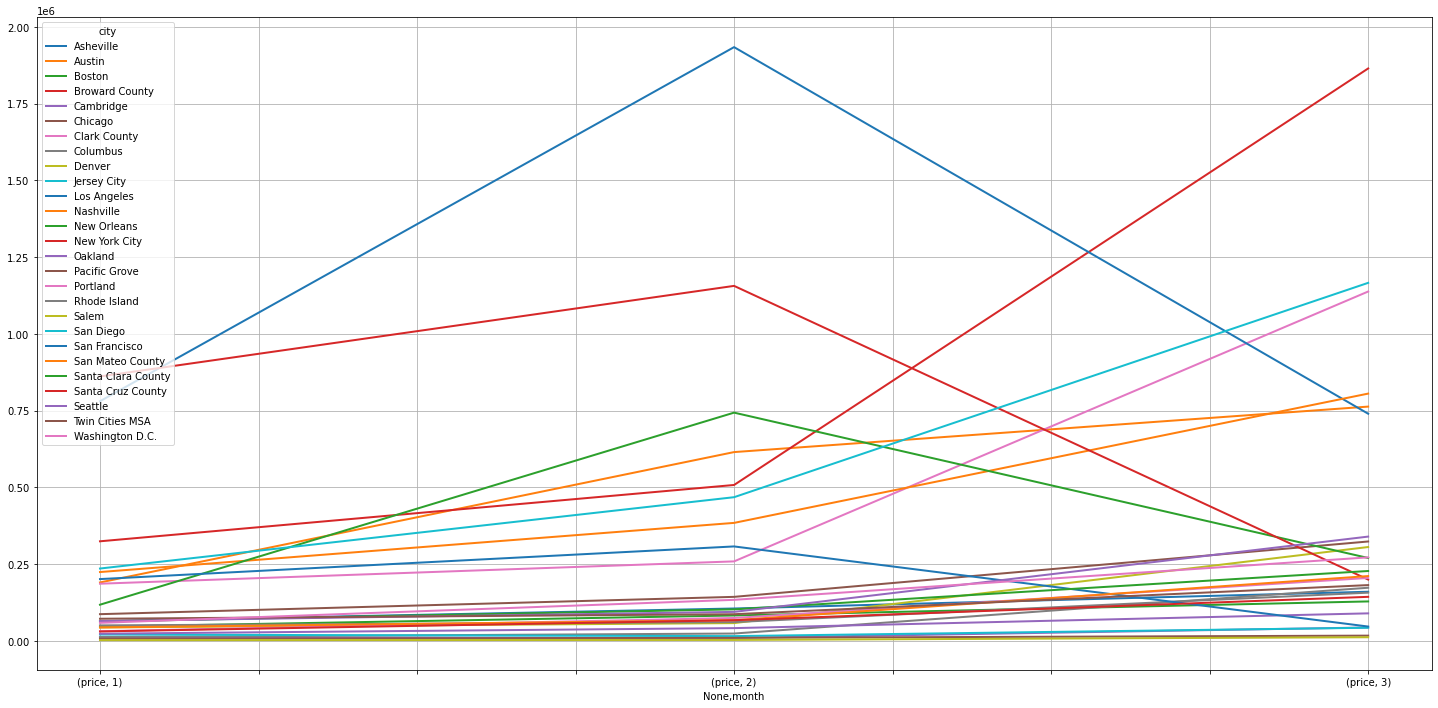

In [173]:
ax = df_final.plot(figsize=(25,12),linewidth=2,grid=True, alpha=1)
#xtick = pd.date_range( start=ax.index.min( ), end=ts.index.max( ), freq='W' )
#ax.set_xticks( xtick, minor=True )
ax.grid('on', which='minor', axis='x' )
#ax.grid('off', which='major', axis='x' )

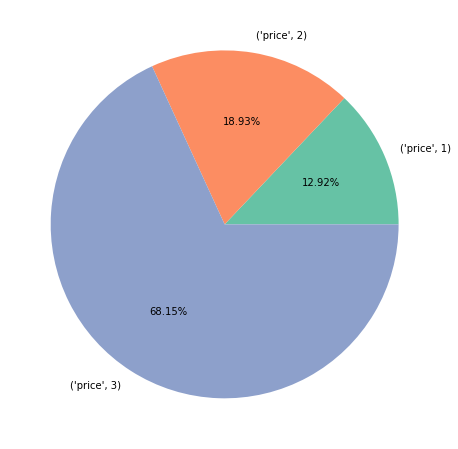

In [174]:
plt.figure(figsize=(8,8))

plt.pie(
    x=df_final['Seattle'], 
    labels=df_final.index,
    autopct='%1.2f%%',
    # Use Seaborn's color palette 'Set2'
    colors=sns.color_palette('Set2')
)
plt.show()